# Übungsblatt 9
## Präsenzaufgaben
### Aufgabe 1 &nbsp;&nbsp;&nbsp; Unifikation I

In [1]:
from nltk.featstruct import FeatStruct

Gegeben seien folgende Merkmalstrukturen:

In [2]:
f1 = FeatStruct(
    '[Vorname=Max, Nachname=Mustermann,' + 
    'Privat=[Strasse=Hauptstrasse, Ort=[Muenchen]]]'
)
f2 = FeatStruct(
    '[Arbeit=[Strasse="Oettingenstrasse", Ort=(1)["Muenchen"]],' +
    'Privat=[Ort->(1)]]')
f3 = FeatStruct(
    '[Strasse="Hauptstrasse"]'
)
f4 = FeatStruct(
    '[Privat=[Strasse="Hauptstrasse", Ort=["Passau"]]]'
)

Unifizieren Sie:
- f1 mit f2

In [3]:
print(f1.unify(f2).__repr__())

[Arbeit=[Ort=(1)['Muenchen'], Strasse='Oettingenstrasse'], Nachname='Mustermann', Privat=[Ort->(1), Strasse='Hauptstrasse'], Vorname='Max']


- f2 mit f4

In [4]:
print(f2.unify(f4).__repr__())

None


### Aufgabe 2 &nbsp;&nbsp;&nbsp; Typhierarchie im NLTK

Gegeben sei folgende Typhierarchie:

$$\bot \sqsubseteq \text{Genitiv}$$
$$\bot \sqsubseteq \text{nicht-Genitiv}$$
$$\text{nicht-Genitiv} \sqsubseteq \text{Nominativ-Akkusativ}$$
$$\text{nicht-Genitiv} \sqsubseteq \text{Dativ}$$
$$\text{Nominativ-Akkusativ} \sqsubseteq \text{Nominativ}$$
$$\text{Nominativ-Akkusativ} \sqsubseteq \text{Akkusativ}$$

Implementieren Sie mithilfe der Klasse `HierarchicalFeature`,
die Sie sich von der Kurs-Website herunterladen können, ein Feature `CASE`, das der vorgegebenen Typhierarchie entspricht.

Nutzen Sie dieses Feature dann, um Übergenerierung in folgender Grammatik zu vermeiden:

In [5]:
grammar = """
S -> NP[*CASE*=nom] VP
NP[*CASE*=?x] -> DET[*CASE*=?x,GEN=?y] NOM[*CASE*=?x,GEN=?y]
NOM[*CASE*=?x,GEN=?y] -> N[*CASE*=?x,GEN=?y] NP[*CASE*=gen]
NOM[*CASE*=?x,GEN=?y] -> N[*CASE*=?x,GEN=?y]
VP -> V

V -> "schläft"
DET[*CASE*=nomakk,GEN=fem] -> "die"
DET[*CASE*=nomakk,GEN=neut] -> "das"
DET[*CASE*=gen,GEN=mask] -> "des"
DET[*CASE*=gen,GEN=neut] -> "des"
DET[*CASE*=nom,GEN=mask] -> "der"
DET[*CASE*=gen,GEN=fem] -> "der"

N[*CASE*=nongen,GEN=mask] -> "Mann"
N[*CASE*=nongen,GEN=fem] -> "Frau"
N[*CASE*=nongen,GEN=neut] -> "Kind"
N[*CASE*=gen,GEN=fem] -> "Frau"
N[*CASE*=gen,GEN=mask] -> "Mannes"
N[*CASE*=gen,GEN=neut] -> "Kindes"
"""

In [6]:
from IPython.display import display
import nltk
from typed_features import HierarchicalFeature, TYPE

Hier muss die Typhierarchie in Form eines `Dictionary` definiert werden:

In [7]:
type_hierarchy = {
    "gen": [],
    "nongen": ["nomakk", "dat"],
    "nomakk": ["nom", "akk"],
    "nom": [],
    "dat": [],
    "akk": []
}

In [8]:
CASE = HierarchicalFeature("CASE", type_hierarchy)
compiled_grammar = nltk.grammar.FeatureGrammar.fromstring(
    grammar, features=(CASE, TYPE)
)
parser = nltk.FeatureEarleyChartParser(compiled_grammar)

Folgendes sollte funktionieren:

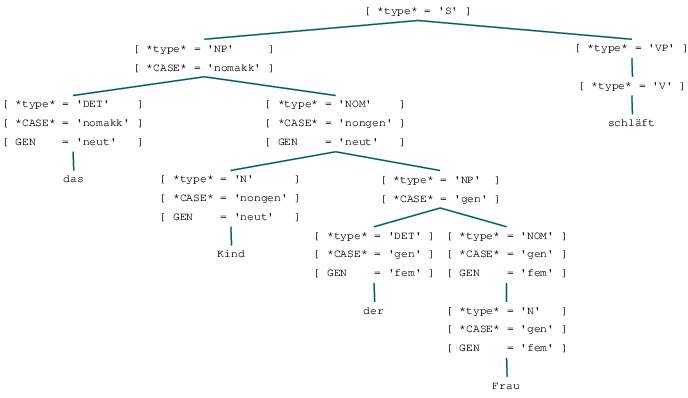

In [9]:
for t in parser.parse("das Kind der Frau schläft".split()):
    display(t)

Folgendes sollte leer sein:

In [10]:
list(parser.parse("des Mannes schläft".split()))

[]

Folgendes sollte wieder funktionieren. Betrachten Sie aufmerksam die Merkmale im Syntaxbaum.

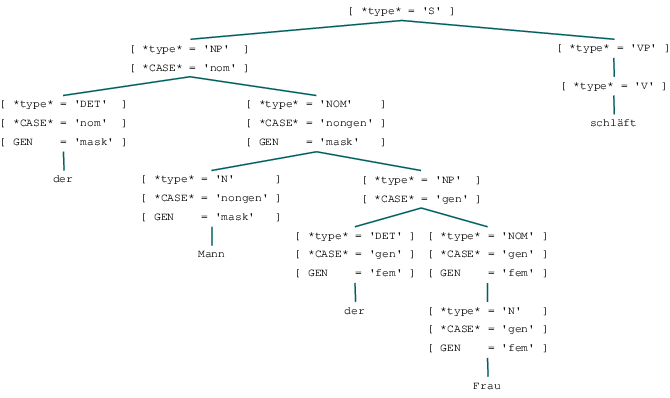

In [11]:
for t in parser.parse("der Mann der Frau schläft".split()):
    display(t)

## Hausaufgaben
### Aufgabe 3 &nbsp;&nbsp;&nbsp; Unifikation II
Es seien wieder die Merkmalstrukturen aus Aufgabe 1 gegeben.

Unifizieren Sie:
- f1 mit f4

In [12]:
print(f1.unify(f4).__repr__())

None


- f2 mit f3

In [13]:
print(f2.unify(f3).__repr__())

[Arbeit=[Ort=(1)['Muenchen'], Strasse='Oettingenstrasse'], Privat=[Ort->(1)], Strasse='Hauptstrasse']


### Aufgabe 4 &nbsp;&nbsp;&nbsp; Weniger Redundanz dank besonderer Merkmale
Beseitigen Sie die Redundanz in den lexikalischen Regeln (Zeilen 8 - 32) der folgenden Grammatik durch eine Typhierarchie (wo dies nötig ist). Achten Sie darauf, die Menge der akzeptierten Sätze weder zu verkleinern noch zu vergrößern!

Anzugeben sind die neuen Grammatikregeln, sowie Ihre Typhierarchie (z. B. in graphischer Form).

In [14]:
case_hierarchy = {
    "nongen": ["nomakk", "dat"],
    "gendat": ["gen", "dat"],
    "nomakk": ["nom", "akk"],
    "nom": [],
    "gen": [],
    "dat": [],
    "akk": []
}
gen_hierarchy = {
    "maskneut": ["mask", "neut"],
    "mask": [],
    "fem": [],
    "neut": []
}

In [15]:
redundant_grammar = """
S -> NP[*KAS*=nom] VP

NP[*KAS*=?y] -> DET[*GEN*=?x,*KAS*=?y] NOM[*GEN*=?x,*KAS*=?y]
NOM[*GEN*=?x,*KAS*=?y] -> N[*GEN*=?x,*KAS*=?y] NP[*KAS*=gen]
NOM[*GEN*=?x,*KAS*=?y] -> N[*GEN*=?x,*KAS*=?y]

DET[*GEN*=mask,*KAS*=nom] -> "der"
DET[*GEN*=maskneut,*KAS*=gen] -> "des"
DET[*GEN*=maskneut,*KAS*=dat] -> "dem"
DET[*GEN*=mask,*KAS*=akk] -> "den"

DET[*GEN*=fem,*KAS*=nomakk] -> "die"
DET[*GEN*=fem,*KAS*=gendat] -> "der"

DET[*GEN*=neut,*KAS*=nomakk] -> "das"

N[*GEN*=mask,*KAS*=nongen] -> "Mann"
N[*GEN*=mask,*KAS*=gen] -> "Mannes"
N[*GEN*=fem] -> "Frau"
N[*GEN*=neut,*KAS*=nongen] -> "Buch"
N[*GEN*=neut,*KAS*=gen] -> "Buches"

VP -> V NP[*KAS*=dat] NP[*KAS*=akk]
V -> "gibt" | "schenkt"
"""

In [16]:
CASE = HierarchicalFeature("KAS", case_hierarchy)
GEN = HierarchicalFeature("GEN", gen_hierarchy)
compiled_grammar = nltk.grammar.FeatureGrammar.fromstring(
    redundant_grammar, features=(CASE, GEN, TYPE)
)
parser = nltk.FeatureEarleyChartParser(compiled_grammar)

In [17]:
pos_sentences = [
    "der Mann gibt der Frau das Buch",
    "die Frau des Mannes gibt dem Mann der Frau das Buch des Buches"
]

Testen Sie mit Ihren eigenen Negativbeispielen!

In [18]:
neg_sentences = [
    "des Mannes gibt der Frau das Buch",
    "Mann gibt der Frau das Buch",
    "der Mann gibt der Frau Buch",
    "der Frau gibt dem Buch den Mann",
    "das Buch der Mann gibt der Frau das Buch"
]

In [19]:
import sys

def test_grammar(parser, sentences):    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        sys.stdout.flush()
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            display(tree)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)
            sys.stderr.flush()

Satz 1: der Mann gibt der Frau das Buch


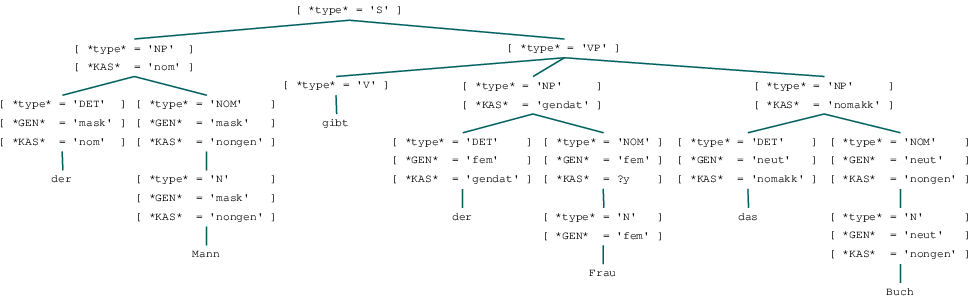

Satz 2: die Frau des Mannes gibt dem Mann der Frau das Buch des Buches


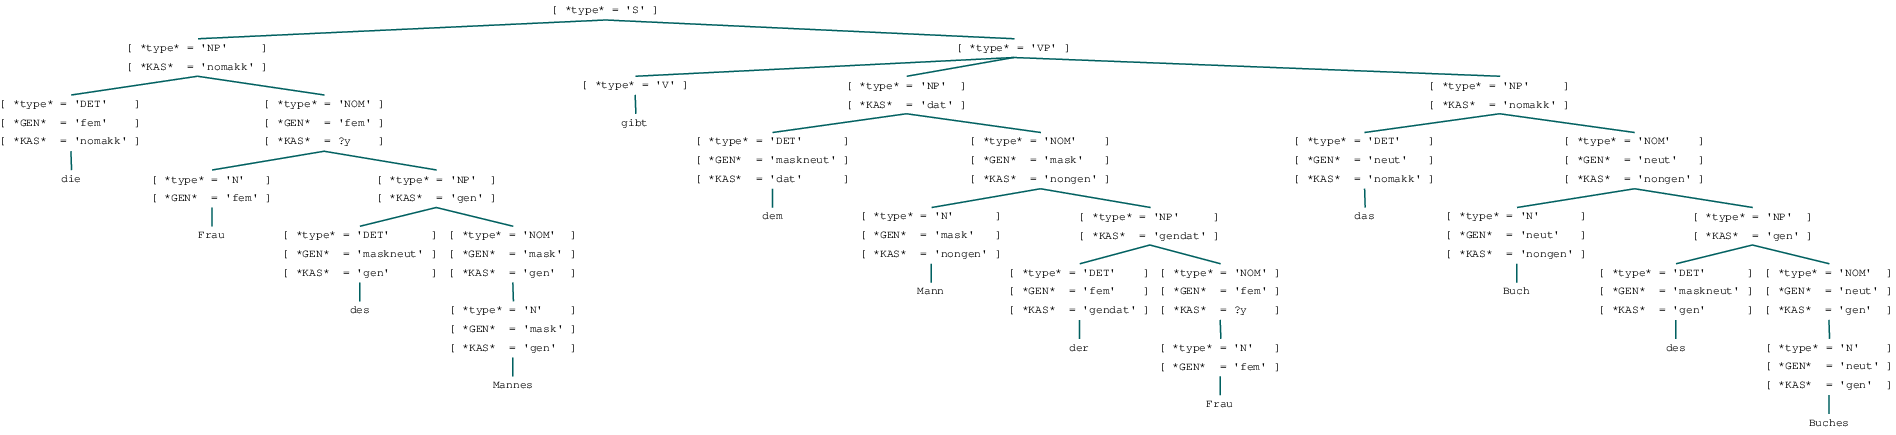

In [20]:
test_grammar(parser, pos_sentences)

In [21]:
test_grammar(parser, neg_sentences)

Satz 1: des Mannes gibt der Frau das Buch


Keine Analyse möglich


Satz 2: Mann gibt der Frau das Buch


Keine Analyse möglich


Satz 3: der Mann gibt der Frau Buch


Keine Analyse möglich


Satz 4: der Frau gibt dem Buch den Mann


Keine Analyse möglich


Satz 5: das Buch der Mann gibt der Frau das Buch


Keine Analyse möglich
